**zerotogbms-project**

My attempt to work on the following kaggle project for personal development / jovian.

**Walmart Recruiting** - Store Sales Forecasting
Use historical markdown data to predict store sales. 
From the competition page, we have a decription as follows..
This project has data that is provided containing historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. 


In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('zerotogbms-project')
jovian.set_colab_id('1AVUxIO6BBI_HgyhzjPpAWIS7AXSfOep4')

     |████████████████████████████████| 68 kB 4.1 MB/s 


In [1]:
!pip install pandas numpy matplotlib seaborn --quiet
!pip install jovian --upgrade --quiet
!pip install opendatasets scikit-learn jovian --quiet --upgrade

     |████████████████████████████████| 68 kB 2.7 MB/s 
     |████████████████████████████████| 22.3 MB 62.4 MB/s 


In [ ]:
import jovian
import matplotlib
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


In [ ]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Import the data set using opendatasets library.

In [ ]:
dataset_url="https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting"

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maacky05
Your Kaggle Key: ··········


100%|██████████| 2.70M/2.70M [00:00<00:00, 146MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [ ]:
data_dir = "./walmart-recruiting-store-sales-forecasting"
os.listdir(data_dir)

['features.csv.zip',
 'stores.csv',
 'test.csv.zip',
 'sampleSubmission.csv.zip',
 'train.csv.zip']

In [ ]:
features_csv = data_dir + '/features.csv.zip'
store_csv = data_dir + '/stores.csv'
train_csv = data_dir + '/train.csv.zip'
test_csv = data_dir + '/test.csv.zip'

In [ ]:
df_features = pd.read_csv(features_csv,sep=',')
df_stores = pd.read_csv(store_csv,sep=',')
df_train = pd.read_csv(train_csv,sep=',')
df_test = pd.read_csv(test_csv,sep=',')

In [ ]:
#Perform a merge on the store and feature df's
feature_store_combo_df = df_features.merge(df_stores, how='inner', on = "Store")

In [ ]:
#Perform a conversion from object to Date type
feature_store_combo_df['Date'] = pd.to_datetime(feature_store_combo_df['Date']) 

In [ ]:
# Converting date column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Adding some basic features
feature_store_combo_df['Day'] = feature_store_combo_df['Date'].dt.day
feature_store_combo_df['Week'] = feature_store_combo_df['Date'].dt.week
feature_store_combo_df['Month'] = feature_store_combo_df['Date'].dt.month
feature_store_combo_df['Year'] = feature_store_combo_df['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


Create tables with merge so you can perform training on data with correct columns.

In [ ]:
train_df = df_train.merge(feature_store_combo_df, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
test_df = df_test.merge(feature_store_combo_df, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
train_df.shape, test_df.shape               

((421570, 20), (115064, 19))

In [ ]:
import plotly.express as px
plt.figure(figsize = (15,10))
px.pie(data_frame=df_stores,names='Type',template=None,title='Different types of Stores')

<Figure size 1080x720 with 0 Axes>

In [ ]:
#Eaiser to work with names
trainSet = train_df.copy()
testSet = test_df.copy()
trainSet.shape,testSet.shape

((421570, 20), (115064, 19))

In [ ]:
weekly_sales_corr = trainSet.corr().iloc[2,:]

In [ ]:
corr_df = pd.DataFrame(data = weekly_sales_corr, index = weekly_sales_corr.index ).sort_values (by = 'Weekly_Sales', ascending = False)
corr_df

,Weekly_Sales
Weekly_Sales,1.000000
Size,0.243828
Dept,0.148032
MarkDown5,0.090362
MarkDown1,0.085251
MarkDown3,0.060385
MarkDown4,0.045414
Month,0.028409
Week,0.027673
MarkDown2,0.024130


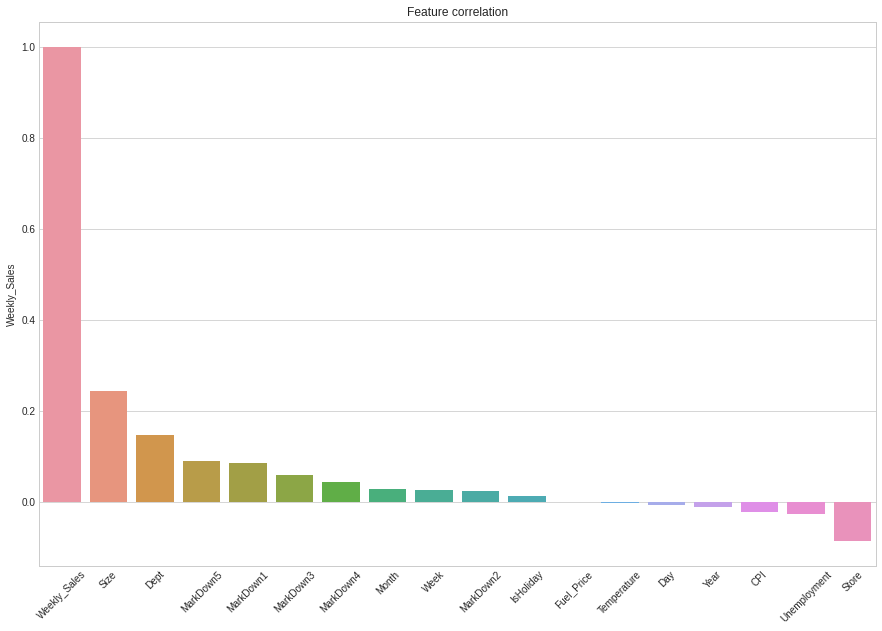

In [ ]:
plt.figure(figsize = (15,10))
sns.set_palette('mako')
plt.xticks(rotation = 45)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Weekly_Sales');

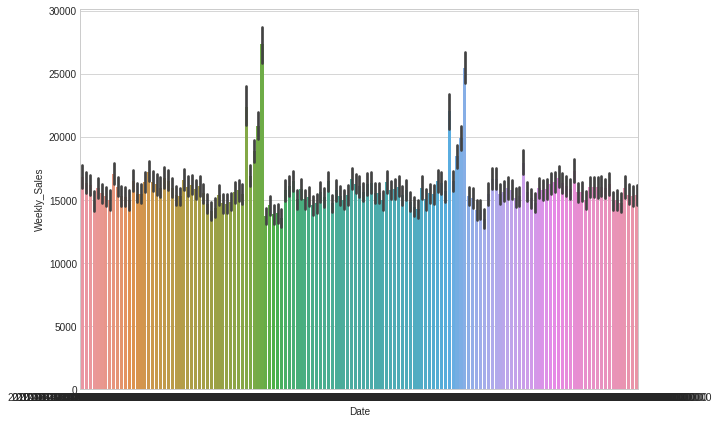

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Date', y='Weekly_Sales', data=trainSet)

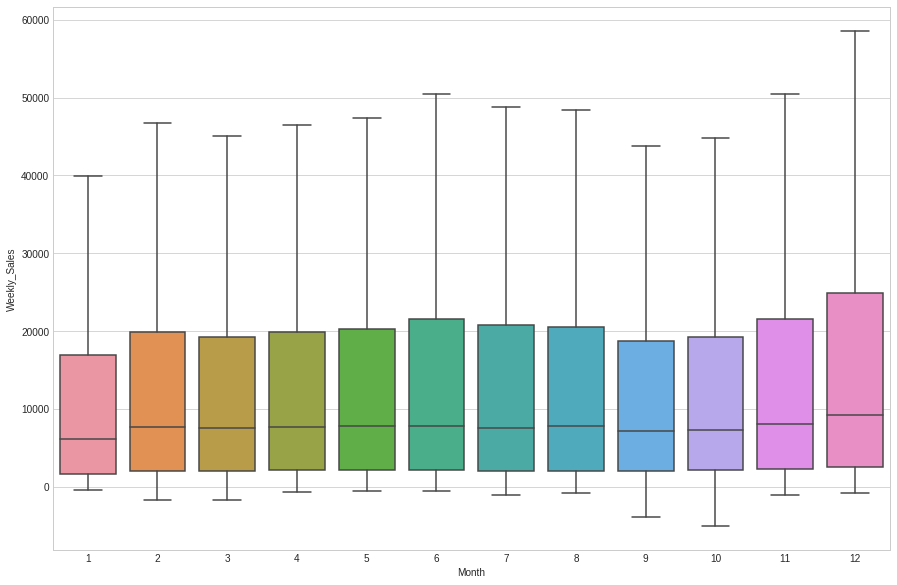

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x="Month", y="Weekly_Sales", data=trainSet, showfliers=False)

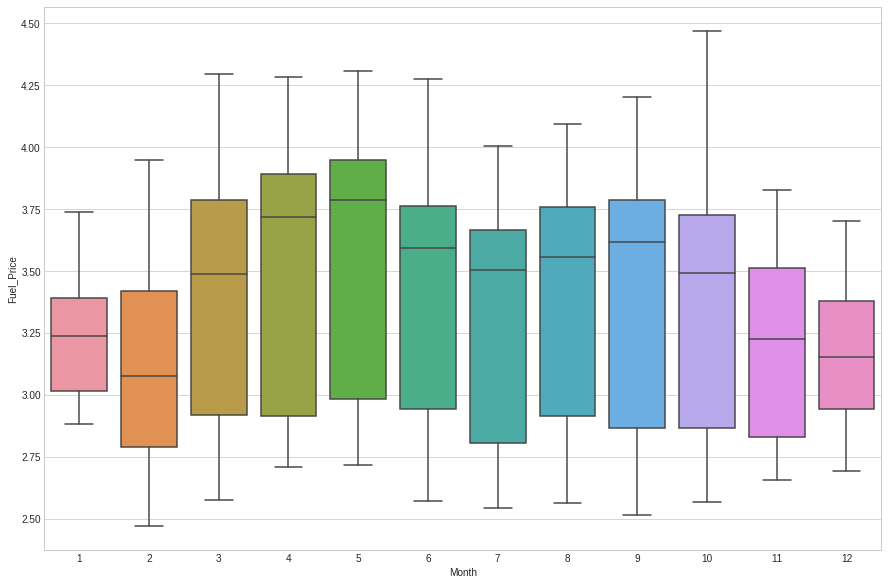

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x="Month", y="Fuel_Price", data=trainSet, showfliers=False)

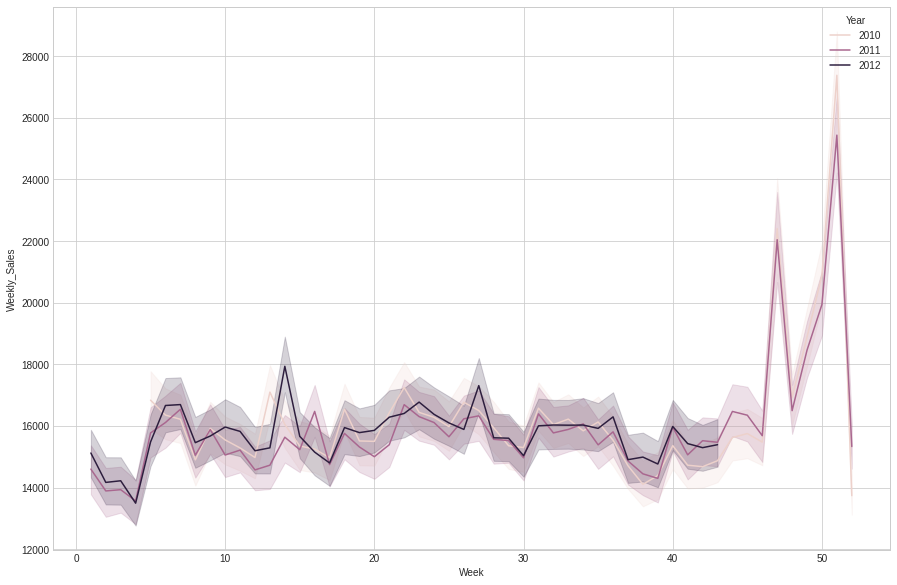

In [ ]:
plt.figure(figsize = (15,10))
sns.lineplot(x="Week", y="Weekly_Sales", data=trainSet, hue='Year')

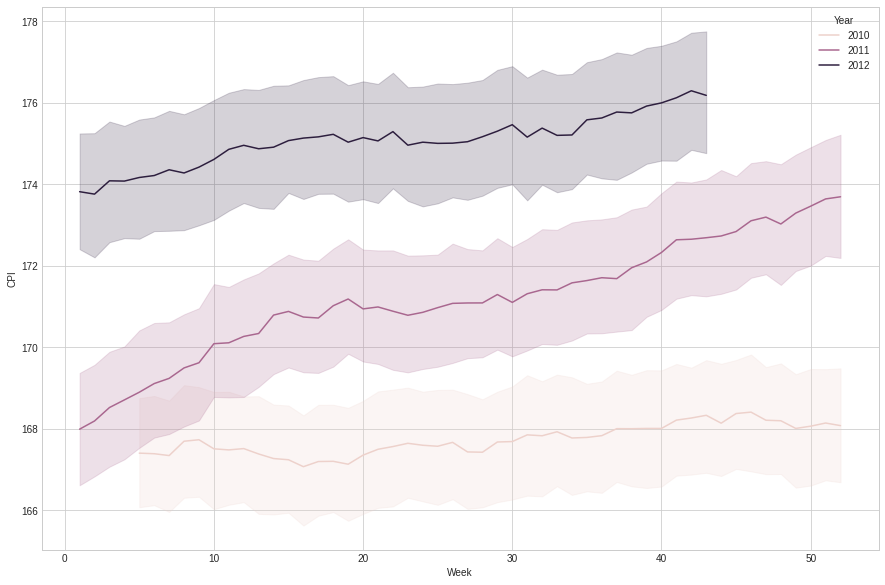

In [ ]:
plt.figure(figsize = (15,10))
sns.lineplot(x="Week", y="CPI", data=trainSet, hue='Year')

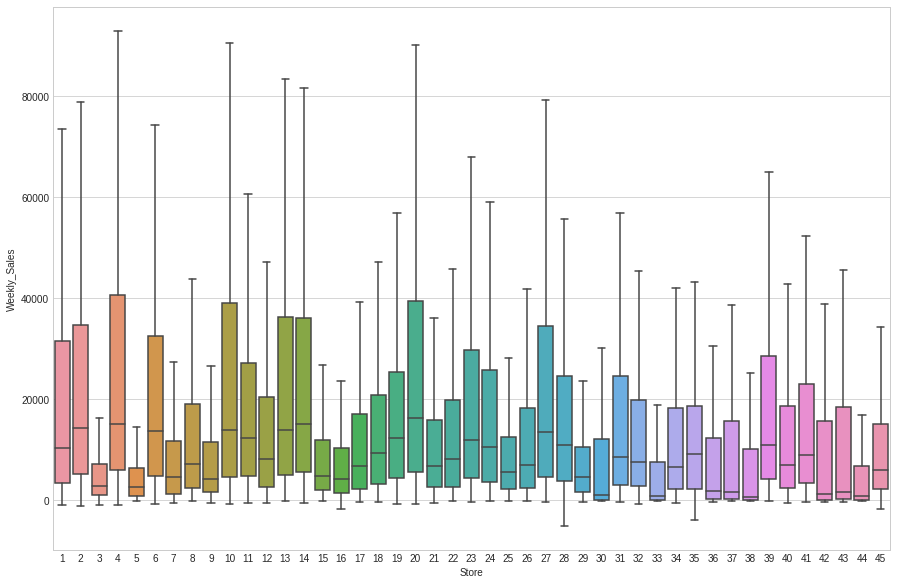

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(y="Weekly_Sales", x="Store", data=trainSet, showfliers=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13de3f2750>,
      dtype=object)

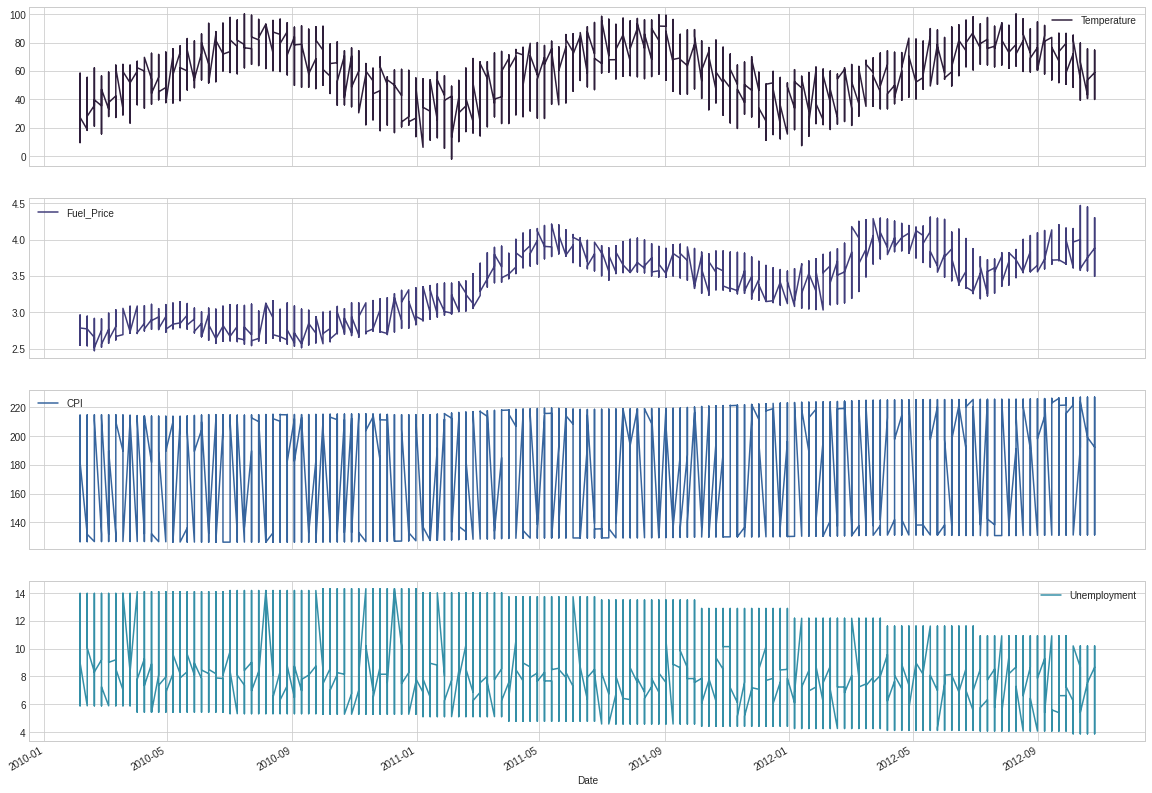

In [ ]:
trainSet[['Date', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']].plot(x='Date',subplots=True,figsize=(20,15),kind='line')

Correlation matrix

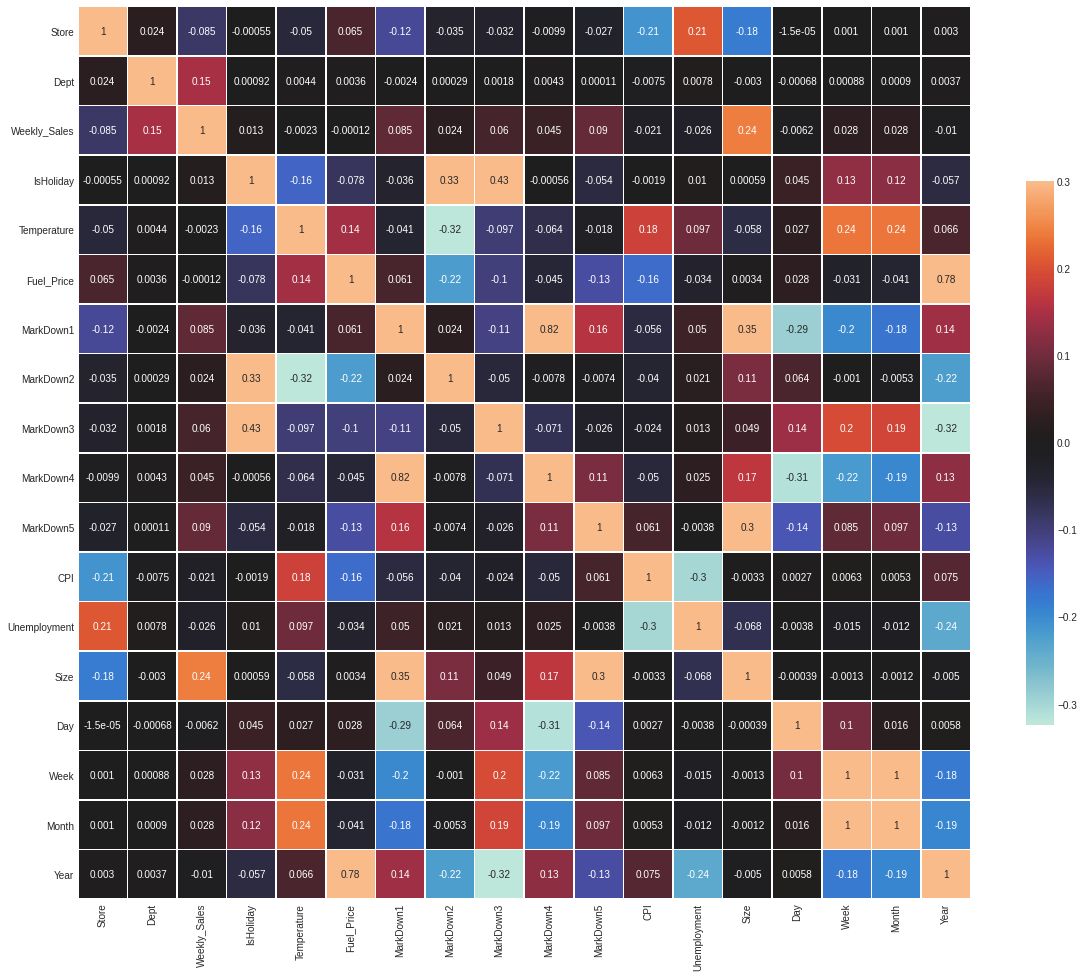

In [ ]:
corr = trainSet.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_2010 = trainSet[trainSet.Year==2010]['Weekly_Sales'].groupby(trainSet['Week']).sum()
df_2011 = trainSet[trainSet.Year==2011]['Weekly_Sales'].groupby(trainSet['Week']).sum()
df_2012 = trainSet[trainSet.Year==2012]['Weekly_Sales'].groupby(trainSet['Week']).sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



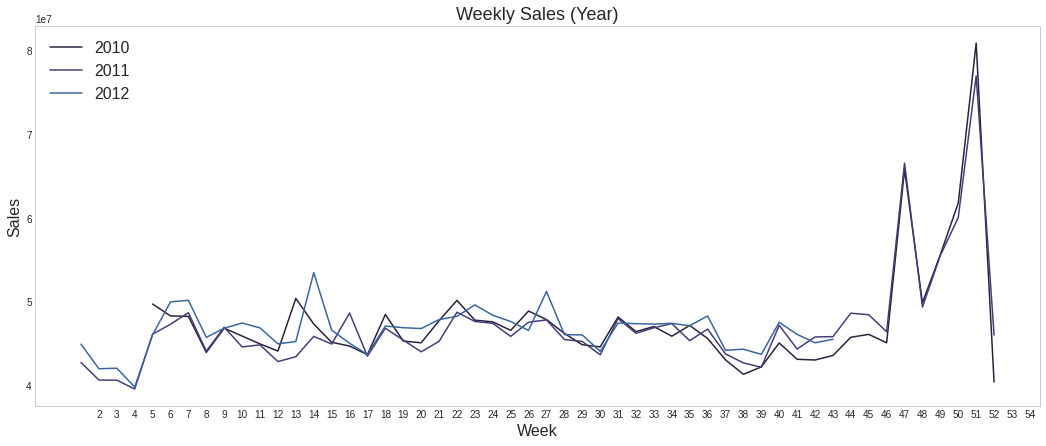

In [ ]:
plt.figure(figsize=(18,7))
sns.lineplot(df_2010.index, df_2010.values)
sns.lineplot(df_2011.index, df_2011.values)
sns.lineplot(df_2012.index, df_2012.values)
plt.grid()
plt.xticks(np.arange(2, 55, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Weekly Sales (Year)', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [ ]:
#Make a new column that contains the sum of the markdown promotions.
trainSet['MarkdownsSum'] = trainSet['MarkDown1'] + trainSet['MarkDown2'] + trainSet['MarkDown3'] + trainSet['MarkDown4'] + trainSet['MarkDown5'] 


In [ ]:
trainSet.shape

(421570, 21)

In [ ]:
#Make a new column that contains the sum of the markdown promotions.
testSet['MarkdownsSum'] = testSet['MarkDown1'] + testSet['MarkDown2'] + testSet['MarkDown3'] + testSet['MarkDown4'] + testSet['MarkDown5'] 


In [ ]:
testSet.shape

(115064, 20)

In [ ]:
trainSet.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Day                  0
Week                 0
Month                0
Year                 0
MarkdownsSum    324514
dtype: int64

In [ ]:
#Markdown columns contain the majority of the missing values

In [ ]:
#Show missing values in a average % format for clarity.
trainSet.isna().mean() * 100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
Day              0.000000
Week             0.000000
Month            0.000000
Year             0.000000
MarkdownsSum    76.977489
dtype: float64

In [ ]:
testSet.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
MarkdownsSum    37457
dtype: int64

In [ ]:
#Mardown and CPI/Unemployment columns containg missing values.

In [ ]:
#Show missing values in test set in form of average %
testSet.isna().mean() * 100

Store            0.000000
Dept             0.000000
Date             0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
Type             0.000000
Size             0.000000
Day              0.000000
Week             0.000000
Month            0.000000
Year             0.000000
MarkdownsSum    32.553188
dtype: float64

In [ ]:
#Fill in the missing values

In [ ]:
#Training set will be with 0's because of the istance of markdown.
trainSet.fillna(0,inplace=True)

In [ ]:
#Take care of TestSet first with using mean for CPI and Unemployment since they seem to be needed. After 
# we will just use 0's for the markdowns like we did in the trainSet.
testSet['CPI'].fillna(testSet['CPI'].mean(),inplace=True)

In [ ]:
#Avg for missing unemployment numbers.
testSet['Unemployment'].fillna(testSet['Unemployment'].mean(),inplace=True)

In [ ]:
testSet.fillna(0,inplace=True) # Start with the categorical columns making 1 and 0 starting with isHoliday.

In [ ]:
trainSet['IsHoliday'] = trainSet['IsHoliday'].apply(lambda x: 1 if x == True else 0)
testSet['IsHoliday'] = testSet['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [ ]:
trainSet.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year,MarkdownsSum
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,5,2,2010,0.0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,12,6,2,2010,0.0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,19,7,2,2010,0.0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,26,8,2,2010,0.0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,5,9,3,2010,0.0


In [ ]:
testSet.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year,MarkdownsSum
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2,44,11,2012,18342.28
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,9,45,11,2012,25633.44
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,16,46,11,2012,17838.00
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,23,47,11,2012,76311.31
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,A,151315,30,48,11,2012,0.00


In [ ]:
trainSet.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Day             0
Week            0
Month           0
Year            0
MarkdownsSum    0
dtype: int64

In [ ]:
testSet.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Day             0
Week            0
Month           0
Year            0
MarkdownsSum    0
dtype: int64

In [ ]:
#Encode the categorical column ('Type')

In [ ]:
trainSet['Type'] = trainSet['Type'].apply(lambda x: 1 if x =='A' else (2 if x == 'B' else 3))

In [ ]:
testSet['Type'] = testSet['Type'].apply(lambda x: 1 if x== 'A' else (2 if x == 'B' else 3))

In [ ]:
#View skewness metric

In [ ]:
trainSet.skew()

Store            0.077763
Dept             0.358223
Weekly_Sales     3.262008
IsHoliday        3.359867
Temperature     -0.321404
Fuel_Price      -0.104901
MarkDown1        4.731304
MarkDown2       10.645956
MarkDown3       14.922341
MarkDown4        8.077666
MarkDown5        9.964519
CPI              0.085219
Unemployment     1.183743
Type             0.693311
Size            -0.325850
Day              0.009423
Week             0.052659
Month            0.040786
Year             0.056236
MarkdownsSum     4.262036
dtype: float64

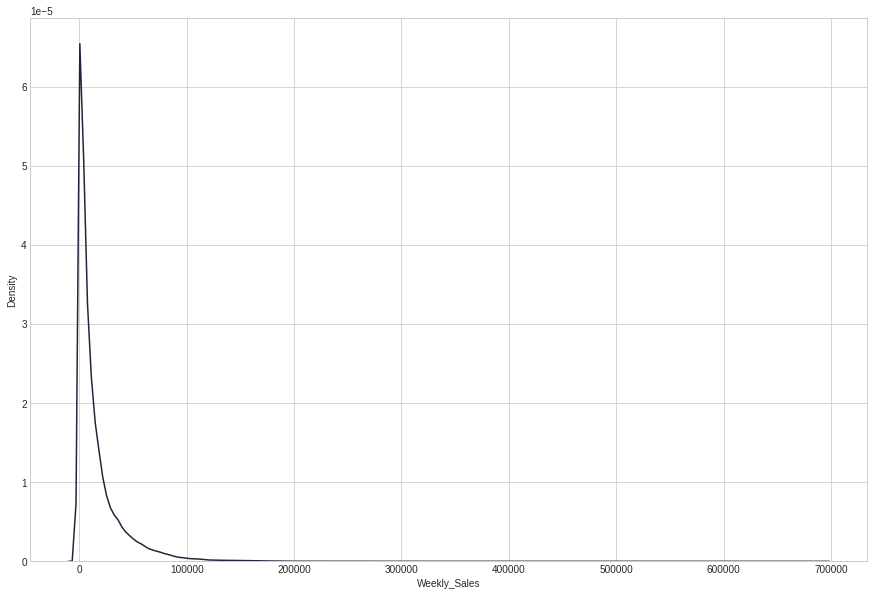

In [ ]:
plt.figure(figsize = (15,10))
sns.kdeplot(trainSet['Weekly_Sales'])

In [ ]:
print("Skewness for our weekly sales {},".format(trainSet['Weekly_Sales'].skew().round()))

Skewness for our weekly sales 3.0,


In [ ]:
print("Kurtosis weekly sales {},".format(trainSet['Weekly_Sales'].kurt().round()))

Kurtosis weekly sales 21.0,


In [ ]:
#FB info next for training

In [ ]:
trainSet.corr()['Weekly_Sales'][:10].sort_values(ascending = False)

Weekly_Sales    1.000000
Dept            0.148032
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [ ]:
X1 = trainSet.drop(['Date','Weekly_Sales'], axis = 'columns' )
y1 = trainSet['Weekly_Sales']

In [ ]:
rf_featureFrame = RandomForestRegressor() 

In [ ]:
rf_featureFrame.fit(X1, y1) #Fit model

RandomForestRegressor()

Create the feature importance chart. Some features have less importance.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X1.columns,
    'importance': rf_featureFrame.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
rf_featureFrame.feature_importances_

array([5.76376977e-02, 6.28934241e-01, 8.61520436e-04, 9.10229164e-03,
       3.65794838e-03, 8.08630184e-04, 7.42204796e-04, 4.57394145e-03,
       1.16277874e-03, 9.09922674e-04, 2.51508407e-02, 1.05799561e-02,
       1.42477876e-02, 1.89548532e-01, 8.10082483e-03, 3.70792408e-02,
       6.01150653e-03, 2.41995153e-04, 6.48138756e-04])

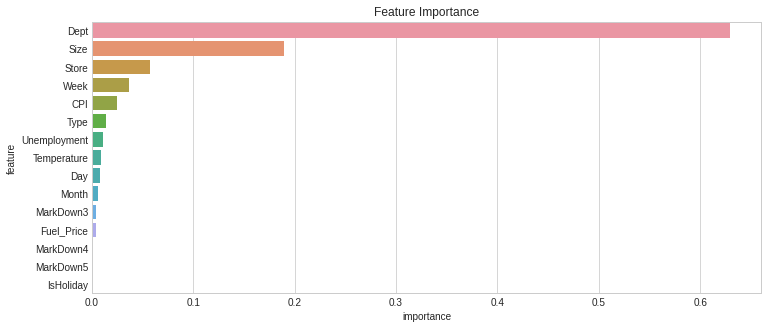

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

This is the start of the model training

In [ ]:
# Set var's for training 
X = trainSet[['Store','Dept','IsHoliday','Size','Week','Type','Year']]
y = trainSet['Weekly_Sales']

In [ ]:
#Splt 70 30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(verbose=1)
RF.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestRegressor(verbose=1)

In [ ]:
preds_train = RF.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.2s finished


In [ ]:
preds_test = RF.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.5s finished


In [ ]:
from sklearn import metrics
metrics.mean_squared_error(y_train, preds_train, squared = False)

1250.7628568982122

In [ ]:
metrics.mean_squared_error(y_test, preds_test, squared = False)

3872.107024831701

In [ ]:
#Tune hyperparameter for Random Forest Regressor


In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)
RF.fit(X_train, y_train)
rmse_value = np.sqrt(metrics.mean_squared_error(y_train, preds_train))
print("RMSE: %f" % (rmse_value))


RMSE: 1250.762857


In [ ]:
preds_train = RF.predict(X_train)

In [ ]:
preds_test = RF.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_train, preds_train, squared = False)

13568.403357282456

In [ ]:
metrics.mean_squared_error(y_test, preds_test, squared = False)

13937.584821308188

In [ ]:
#Linear Regression 


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)



LinearRegression()

In [ ]:
preds_train = linreg.predict(X_train)
preds_test = linreg.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_train, preds_train, squared = False)

21675.17790088684

In [ ]:
metrics.mean_squared_error(y_test, preds_test, squared = False)

21817.765489176945

In [ ]:
#XGBoost

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42,n_estimators=10)
model.fit(X_train, y_train)

[14:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
#Tune Hyperparameter

In [ ]:
model2 = XGBRegressor(n_jobs=-1, random_state=42,n_estimators=20,learning_rate=.5,max_depth=5)
model2.fit(X_train, y_train)

[14:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.5, max_depth=5, n_estimators=20, n_jobs=-1,
             random_state=42)

In [ ]:
model3 = XGBRegressor(n_jobs=-1, random_state=42,n_estimators=30,learning_rate=.8,max_depth=10)
model3.fit(X_train, y_train)

[14:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.8, max_depth=10, n_estimators=30, n_jobs=-1,
             random_state=42)

In [ ]:
#Do XGBR prediction

In [ ]:
test_preds_XGBR = model.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, test_preds_XGBR, squared = False)

19019.69136599024

In [ ]:
test_preds_XGBR2 = model2.predict(X_test)


In [ ]:
metrics.mean_squared_error(y_test, test_preds_XGBR2, squared = False)

8186.3069089471655

In [ ]:
test_preds_XGBR3 = model3.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, test_preds_XGBR3, squared = False)

4089.6052782396496

In [ ]:
#Ridge

In [ ]:
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, y_train)
Y_pred_ridge = ridge.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,Y_pred_ridge))

21818.420354744398

In [ ]:
#Ridge tuned

In [ ]:
ridge = Ridge(alpha=0.05, normalize=True,max_iter=10000)
ridge.fit(X_train, y_train)
Y_pred_ridge = ridge.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,Y_pred_ridge))

21825.618645694612

In [ ]:
#Lasso

In [ ]:
alpha=0.000997
lasso_regr=Lasso(alpha=alpha,max_iter=100000)
lasso_regr.fit(X_train, y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,Y_pred_lasso))

21817.765525072493

In [ ]:
#Lasso Tuned  

In [ ]:
alpha=0.1
lasso_regr=Lasso(alpha=alpha,max_iter=2000)
lasso_regr.fit(X_train, y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,Y_pred_lasso))

21817.769094892927

In [ ]:
#Maybe put this on the top then do other algorthims.

In [ ]:
test = testSet[['Store','Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
predictArry = RF.predict(test)

In [ ]:
predictArry

array([25722.45524455, 25722.45524455, 25540.31119754, ...,
        5305.835632  ,  5305.835632  ,  5295.43478858])

In [ ]:
#I got a better score with Gradient boosting

In [ ]:
test = testSet[['Store','Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
predictArry = model3.predict(test)

In [ ]:
predictArry

array([44020.62   , 19282.396  , 18225.295  , ...,   832.5324 ,
         155.22539,  -720.8755 ], dtype=float32)

Gradient boosting was my prefered end value for weighted mean absolute error

In [ ]:
#Execute this to save new versions of the notebook
jovian.commit(project="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/moombach/zerotogbms-project


'https://jovian.ai/moombach/zerotogbms-project'

In [ ]:
#Jovian Submit code

In [ ]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/moombach/zerotogbms-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
